# Data Pipeline Outline:

0. Imports and Configurations
1. Import + Augment Training and Validation Data
2. Data Processing
3. Fit Model & Save Weights
4. Testing & Postprocessing (Graphs, Metrics, Output Examples, etc.)



# 0. Imports and Configurations

In [4]:
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from models.simpleConv import build_model
import matplotlib.pyplot as plt
%matplotlib inline


dataPath = 'RealImageNet/ImageNetSubsample/Data/CLS-LOC'
trainPath = os.path.join(dataPath, 'train')
testPath = os.path.join(dataPath, 'test')
validationPath = os.path.join(dataPath, 'val')

img_width, img_height = 224, 224

useGrayscale=False
if useGrayscale:
    color_mode='grayscale'
    num_channels=1
else:
    color_mode='rgb'
    num_channels=3
    
    
outputPath = os.path.join('output','saved-models')

saveModel = True
loadModel = False
if(loadModel):
    loadModelPath = os.path.join(outputPath, "model1.h5")
    if not os.path.exists(loadModelPath):
        print("No such model file: " + loadModelPath)


modelName = "model1"

if not os.path.isdir(outputPath):
    os.makedirs(outputPath)
    
    

# 1. Load Training and Validation Data


In [5]:

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   validation_split=0.1)


    
train_generator = train_datagen.flow_from_directory('RealImageNet/ImageNetSubsample/Data/CLS-LOC/train',
                                                   target_size=(img_width, img_height),
                                                   batch_size=16,
                                                   class_mode='categorical',
                                                   color_mode=color_mode,
                                                   subset='training')



val_generator = train_datagen.flow_from_directory('RealImageNet/ImageNetSubsample/Data/CLS-LOC/train',
                                                   target_size=(img_width, img_height),
                                                   batch_size=16,
                                                   class_mode='categorical',
                                                   color_mode='rgb',
                                                   subset='validation')





Found 5850 images belonging to 5 classes.
Found 650 images belonging to 5 classes.


# 2. Data Processing



# 3. Fit Model & Save Weights

In [ ]:
count = 1 
name = "" 
while True:     
    s = modelName[:-1] + str(count) + ".h5"     
    if not s in os.listdir(outputPath):         
        name = s         
        break     
    else:         
        count+=1 
print(name)

if loadModel:
    model = load_model(loadModelPath)
else:
    model = build_model(img_width, img_height, num_channels)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    results = model.fit_generator(
            train_generator,
            validation_data=val_generator,
            steps_per_epoch=100,
            epochs=10)


if saveModel:
    model.save(os.path.join(outputPath, name))

model5.h5
Epoch 1/10
100/100 [==============================] - 34s 338ms/step - loss: 0.4162 - acc: 0.8135 - val_loss: 0.3721 - val_acc: 0.8286
Epoch 2/10
100/100 [==============================] - 31s 308ms/step - loss: 0.3437 - acc: 0.8405 - val_loss: 0.3298 - val_acc: 0.8505
Epoch 3/10
100/100 [==============================] - 31s 309ms/step - loss: 0.3214 - acc: 0.8560 - val_loss: 0.3033 - val_acc: 0.8575
Epoch 4/10
100/100 [==============================] - 29s 290ms/step - loss: 0.3259 - acc: 0.8511 - val_loss: 0.3052 - val_acc: 0.8603
Epoch 5/10
100/100 [==============================] - 26s 256ms/step - loss: 0.3071 - acc: 0.8586 - val_loss: 0.2899 - val_acc: 0.8622
Epoch 6/10
100/100 [==============================] - 26s 256ms/step - loss: 0.3027 - acc: 0.8584 - val_loss: 0.2881 - val_acc: 0.8631
Epoch 7/10
100/100 [==============================] - 26s 261ms/step - loss: 0.2960 - acc: 0.8609 - val_loss: 0.2957 - val_acc: 0.8655
Epoch 8/10
100/100 [=========================

# 4. Testing & Post-Processing (Metrics, Graphs, etc.)

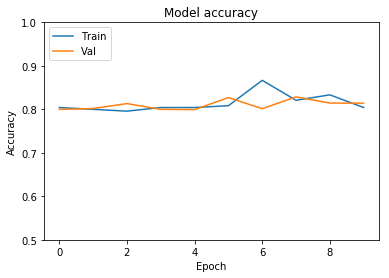

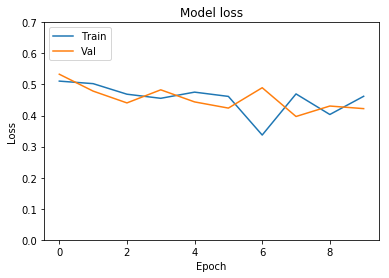

In [12]:


# Plot training & validation accuracy values
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.ylim(0, 0.7)
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()